In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict 
#from sklearn.linear_model import LinearRegression

In [2]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
#import seaborn as sns
#%matplotlib inline

df = pd.read_csv('googleplaystore.csv')
df_review = pd.read_csv('googleplaystore_user_reviews.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
column_name = 'Genres'
data = df[column_name].value_counts().reset_index()
data.rename(columns={'index': 'method', column_name: 'count'}, inplace=True)
data['method'].unique()[~ (';' in data['method'].unique())]

In [23]:
column_name = 'Category'
data = df[column_name].value_counts().reset_index()
data.rename(columns={'index': 'method', column_name: 'count'}, inplace=True)
data

,method,count
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


In [5]:
# how many apps are in each genre
def total_count(df, col1, col2, sign):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    sign - special sign that separates items  

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    
    WARNING:
    this function might produce inaccurate result when items in col1 have similar/overlapping names 
    '''
    new_df = defaultdict(int)
    look_for = []
    # all items w/o special sign 
    for idx in range(df[col1].unique().shape[0]):
        if not sign in df[col1].unique()[idx]:
            look_for.append(df[col1].unique()[idx])

    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

data_clean = total_count(data,'method','count',';')
data_clean.drop(19,axis=0,inplace = True)

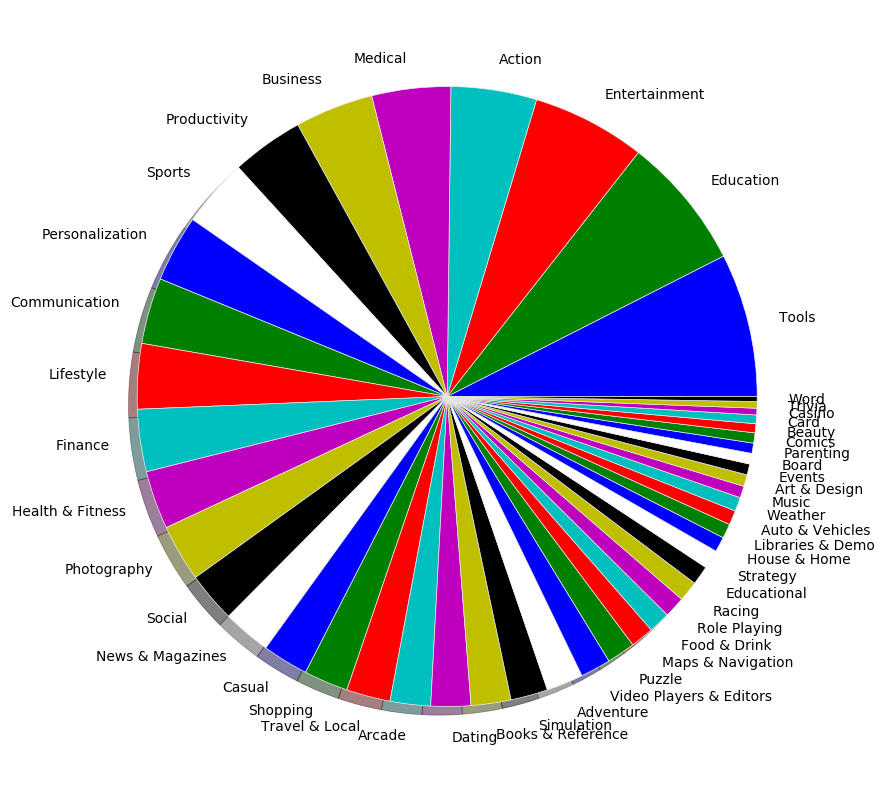

OSError: 'ggplot2' not found in the style library and input is not a valid URL or path. See `style.available` for list of available styles.

In [19]:
# what's the 
f = plt.pie(x =np.array(data_clean['count']),labels = data_clean.method, shadow=True)
plt.show()
plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(10, 10)  

In [20]:
np.array(data_clean['count'])

array([843, 782, 667, 503, 463, 460, 424, 402, 392, 388, 383, 366, 343,
       335, 295, 283, 270, 260, 258, 237, 234, 234, 218, 216, 178, 167,
       137, 127, 123, 119, 112, 111,  88,  85,  85,  82,  69,  69,  64,
        63,  60,  60,  53,  51,  39,  39,  29], dtype=int64)

In [9]:
def multiple_count(df, column_name, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    data = df[column_name].value_counts().reset_index()
    data.rename(columns={'index': 'method', column_name: 'count'}, inplace=True)
    data_df = t.total_count(study, 'method', 'count', possible_vals)


    return props_study_df
    
props_df = clean_and_plot(df)

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

In [ ]:
# commands might be useful 
sns.heatmap(df.corr(), annot=True, fmt=".2f");